### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
# Calcular el ingreso total de cada tienda
ingreso_tienda1 = tienda["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

# Crear un DataFrame con los ingresos de cada tienda
ingresos_totales = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso Total": [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
})

# Mostrar los ingresos totales por tienda
print("Ingresos totales por tienda:")
print(ingresos_totales)

Ingresos totales por tienda:
     Tienda  Ingreso Total
0  Tienda 1   1.150880e+09
1  Tienda 2   1.116344e+09
2  Tienda 3   1.098020e+09
3  Tienda 4   1.038376e+09


In [5]:
ingresos_totales

,Tienda,Ingreso Total
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


<ipython-input-7-789e068990f7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tienda", y="Ingreso Total", data=ingresos_totales, palette="viridis")


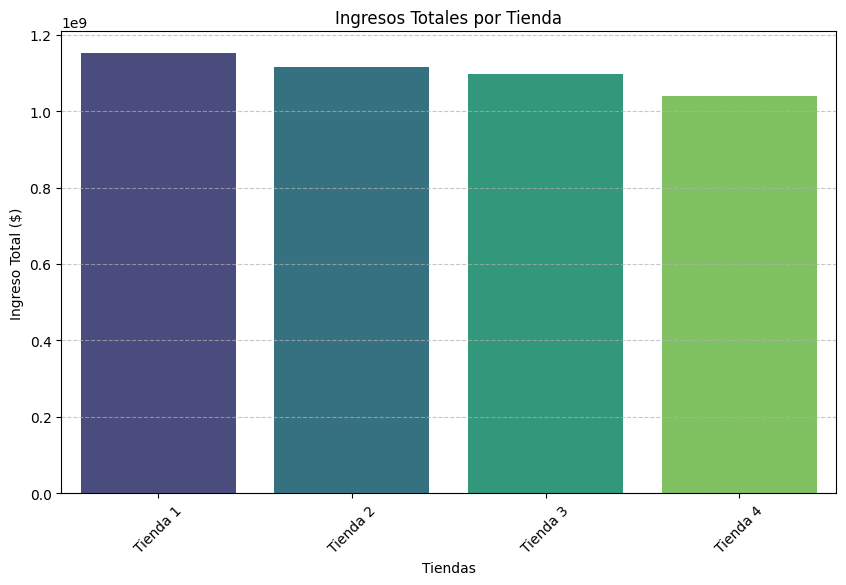

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Crear el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x="Tienda", y="Ingreso Total", data=ingresos_totales, palette="viridis")

# Configuración del gráfico
plt.title("Ingresos Totales por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Ingreso Total ($)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 2. Ventas por categoría

In [15]:
# Función para calcular la cantidad de productos vendidos por categoría en cada tienda y ordenar resultados
def productos_por_categoria(df, nombre_tienda):
    categorias_vendidas = df.groupby("Categoría del Producto")["Producto"].count().reset_index()
    categorias_vendidas = categorias_vendidas.sort_values(by="Producto", ascending=False)  # Orden descendente
    categorias_vendidas["Tienda"] = nombre_tienda
    return categorias_vendidas

# Aplicar la función a cada tienda
categorias_tienda1 = productos_por_categoria(tienda, "Tienda 1")
categorias_tienda2 = productos_por_categoria(tienda2, "Tienda 2")
categorias_tienda3 = productos_por_categoria(tienda3, "Tienda 3")
categorias_tienda4 = productos_por_categoria(tienda4, "Tienda 4")

# Concatenar los resultados en un único DataFrame
categorias_totales = pd.concat([categorias_tienda1, categorias_tienda2, categorias_tienda3, categorias_tienda4], ignore_index=True)

# Ordenar resultados por tienda primero
categorias_totales_ordenadas = categorias_totales.sort_values(by=["Tienda", "Producto"], ascending=[True, False])

# Mostrar los datos
categorias_totales_ordenadas

,Categoría del Producto,Producto,Tienda
0,Muebles,465,Tienda 1
1,Electrónicos,448,Tienda 1
2,Juguetes,324,Tienda 1
3,Electrodomésticos,312,Tienda 1
4,Deportes y diversión,284,Tienda 1
5,Instrumentos musicales,182,Tienda 1
6,Libros,173,Tienda 1
7,Artículos para el hogar,171,Tienda 1
8,Muebles,442,Tienda 2
9,Electrónicos,422,Tienda 2


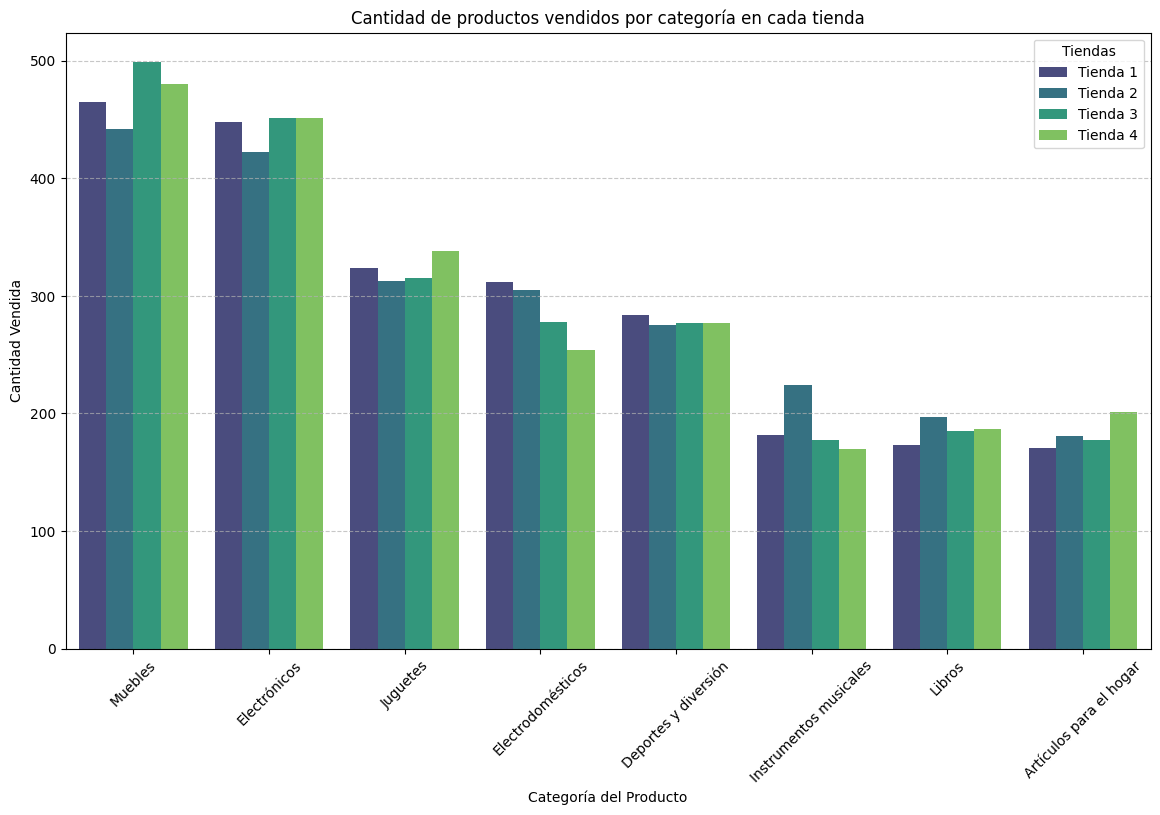

In [16]:
# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x="Categoría del Producto", y="Producto", hue="Tienda", data=categorias_totales, palette="viridis")

# Configuración del gráfico
plt.title("Cantidad de productos vendidos por categoría en cada tienda")
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.legend(title="Tiendas")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar gráfico
plt.show()

# 3. Calificación promedio de la tienda


In [18]:
# Función para calcular la calificación promedio por tienda
def calificacion_promedio(df, nombre_tienda):
    promedio = df["Calificación"].mean()
    return pd.DataFrame({"Tienda": [nombre_tienda], "Calificación Promedio": [promedio]})

# Aplicar la función a cada tienda
calificacion_tienda1 = calificacion_promedio(tienda, "Tienda 1")
calificacion_tienda2 = calificacion_promedio(tienda2, "Tienda 2")
calificacion_tienda3 = calificacion_promedio(tienda3, "Tienda 3")
calificacion_tienda4 = calificacion_promedio(tienda4, "Tienda 4")

# Concatenar los resultados en un único DataFrame
calificaciones_totales = pd.concat([calificacion_tienda1, calificacion_tienda2, calificacion_tienda3, calificacion_tienda4], ignore_index=True)

# Ordenar por calificación de mayor a menor
calificaciones_totales = calificaciones_totales.sort_values(by="Calificación Promedio", ascending=False)

# Mostrar los datos
print("Calificaciones promedio de los clientes por tienda:")
print(calificaciones_totales)

Calificaciones promedio de los clientes por tienda:
     Tienda  Calificación Promedio
2  Tienda 3               4.048326
1  Tienda 2               4.037304
3  Tienda 4               3.995759
0  Tienda 1               3.976685


# 4. Productos más y menos vendidos

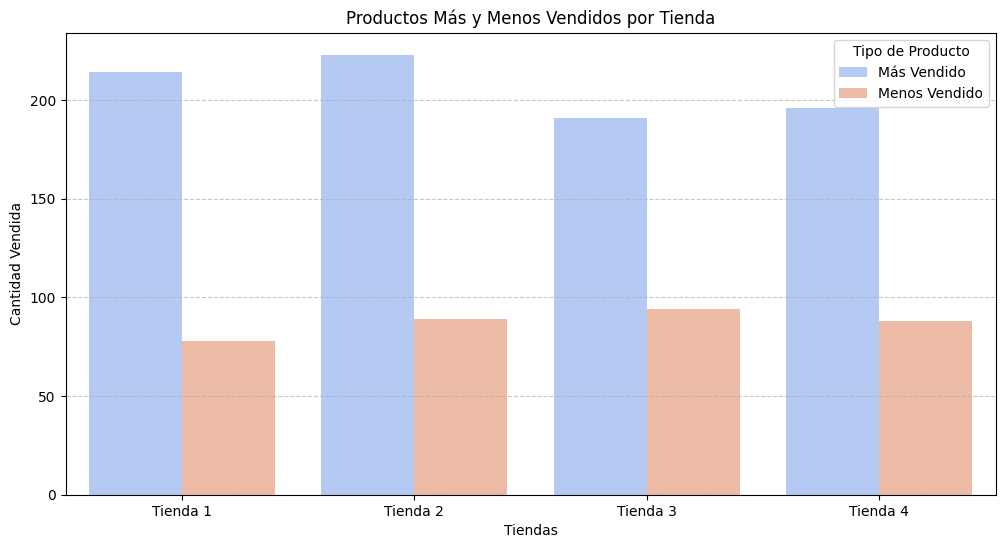

In [26]:
# Función para obtener los productos más vendidos y menos vendidos en cada tienda
def productos_mas_menos_vendidos(df, nombre_tienda):
    productos_vendidos = df.groupby("Producto")["Cantidad de cuotas"].sum().reset_index()
    producto_mas_vendido = productos_vendidos.sort_values(by="Cantidad de cuotas", ascending=False).iloc[0]
    producto_menos_vendido = productos_vendidos.sort_values(by="Cantidad de cuotas").iloc[0]
    return pd.DataFrame({"Tienda": [nombre_tienda, nombre_tienda],
                         "Producto": [producto_mas_vendido["Producto"], producto_menos_vendido["Producto"]],
                         "Cantidad Vendida": [producto_mas_vendido["Cantidad de cuotas"], producto_menos_vendido["Cantidad de cuotas"]],
                         "Tipo": ["Más Vendido", "Menos Vendido"]})

# Aplicar la función a cada tienda
productos_tienda1 = productos_mas_menos_vendidos(tienda, "Tienda 1")
productos_tienda2 = productos_mas_menos_vendidos(tienda2, "Tienda 2")
productos_tienda3 = productos_mas_menos_vendidos(tienda3, "Tienda 3")
productos_tienda4 = productos_mas_menos_vendidos(tienda4, "Tienda 4")

# Concatenar los resultados en un único DataFrame
productos_totales = pd.concat([productos_tienda1, productos_tienda2, productos_tienda3, productos_tienda4], ignore_index=True)

# Crear el gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x="Tienda", y="Cantidad Vendida", hue="Tipo", data=productos_totales, palette="coolwarm")

# Configuración del gráfico
plt.title("Productos Más y Menos Vendidos por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Cantidad Vendida")
plt.legend(title="Tipo de Producto")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar gráfico
plt.show()

# 5. Envío promedio por tienda

In [35]:
# Función para calcular el costo de envío promedio por tienda
def calcular_envio_promedio(df, nombre_tienda):
    costo_promedio = df["Costo de envío"].mean()
    return pd.DataFrame({"Tienda": [nombre_tienda], "Costo de Envío Promedio": [costo_promedio]})

# Aplicar la función a cada tienda
envio_tienda1 = calcular_envio_promedio(tienda, "Tienda 1")
envio_tienda2 = calcular_envio_promedio(tienda2, "Tienda 2")
envio_tienda3 = calcular_envio_promedio(tienda3, "Tienda 3")
envio_tienda4 = calcular_envio_promedio(tienda4, "Tienda 4")

# Concatenar los resultados en un único DataFrame
envios_totales = pd.concat([envio_tienda1, envio_tienda2, envio_tienda3, envio_tienda4], ignore_index=True)

# Mostrar los resultados
print("Costo de envío promedio por tienda:")
print(envios_totales)

Costo de envío promedio por tienda:
     Tienda  Costo de Envío Promedio
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167
